# Liner Regresssion and Lasso , Ridge

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
df = pd.read_excel('Boston_Housing.xlsx')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [49]:
df['Price'] = df['MEDV'] 
del df['MEDV']

In [50]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [51]:
##Divinding the data set into independent and dependent features

X = df.iloc[:,:-1] #independent
y=df.iloc[:,-1] #dependent

In [52]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [53]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64

In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [70]:
#Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lr = LinearRegression()
mse = cross_val_score(lr ,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
mean_mse = np.mean(mse)
print(mean_mse)

-25.187874739285157


In [71]:
#Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV  #hyperparameter tunning

ridge = Ridge()

params = [{'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}]

ridge_reg = GridSearchCV(ridge,params,scoring='neg_mean_squared_error',cv=5)
ridge_reg.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid=[{'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                    20, 30, 35, 40, 45, 50, 55, 100]}],
             scoring='neg_mean_squared_error')

In [72]:
print(ridge_reg.best_params_)
print(ridge_reg.best_score_)

{'alpha': 0.01}
-25.186899367386975


In [73]:
#Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV  #hyperparameter tunning

lasso = Lasso()

params = [{'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}]

lasso_reg = GridSearchCV(lasso,params,scoring='neg_mean_squared_error',cv=5)
lasso_reg.fit(X_train,y_train)

C:\Users\Admin\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.720e+03, tolerance: 2.284e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.028e+03, tolerance: 2.493e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regula

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid=[{'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                    20, 30, 35, 40, 45, 50, 55, 100]}],
             scoring='neg_mean_squared_error')

In [74]:
print(lasso_reg.best_params_)
print(lasso_reg.best_score_)

{'alpha': 1e-15}
-25.187874739285043


In [75]:
lasso_reg.predict(X_test)

array([28.53469469, 36.6187006 , 15.63751079, 25.5014496 , 18.7096734 ,
       23.16471591, 17.31011035, 14.07736367, 23.01064388, 20.54223482,
       24.91632351, 18.41098052, -6.52079687, 21.83372604, 19.14903064,
       26.0587322 , 20.30232625,  5.74943567, 40.33137811, 17.45791446,
       27.47486665, 30.2170757 , 10.80555625, 23.87721728, 17.99492211,
       16.02608791, 23.268288  , 14.36825207, 22.38116971, 19.3092068 ,
       22.17284576, 25.05925441, 25.13780726, 18.46730198, 16.60405712,
       17.46564046, 30.71367733, 20.05106788, 23.9897768 , 24.94322408,
       13.97945355, 31.64706967, 42.48057206, 17.70042814, 26.92507869,
       17.15897719, 13.68918087, 26.14924245, 20.2782306 , 29.99003492,
       21.21260347, 34.03649185, 15.41837553, 25.95781061, 39.13897274,
       22.96118424, 18.80310558, 33.07865362, 24.74384155, 12.83640958,
       22.41963398, 30.64804979, 31.59567111, 16.34088197, 20.9504304 ,
       16.70145875, 20.23215646, 26.1437865 , 31.12160889, 11.89

# Practical Simple Linear Regression

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [78]:
df = pd.read_excel('simple.xlsx')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

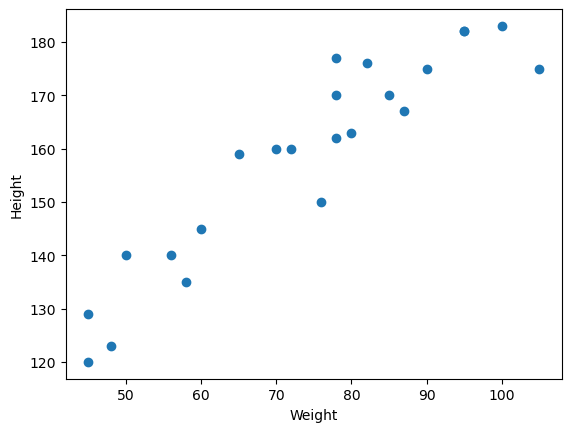

In [80]:
#scatter plot

plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [81]:
#correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


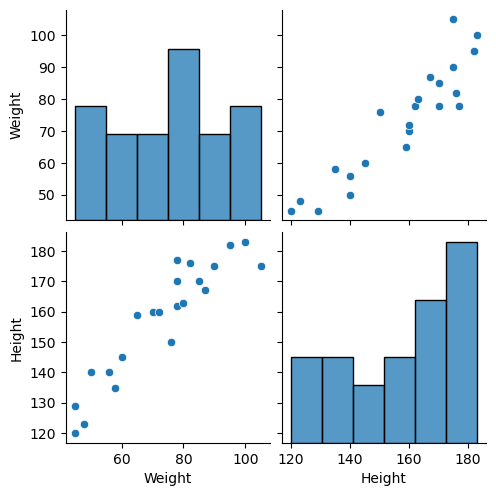

In [82]:
#seaborn
import seaborn as sns
sns.pairplot(df)

In [85]:
##independent and dependent features
X= df[['Weight']] #ind feature is data frame or 2D array
Y = df['Height'] #series or 1D array

In [86]:
#train test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [87]:
X_train.shape

(17, 1)

In [88]:
#standarization
from sklearn.preprocessing import StandardScaler

In [90]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [91]:
X_test = scaler.transform(X_test)

In [92]:
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [93]:
##apply simple linear regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [95]:
reg.fit(X_train,y_train)

LinearRegression()

In [96]:
reg.coef_

array([17.2982057])

In [97]:
reg.intercept_

156.47058823529412

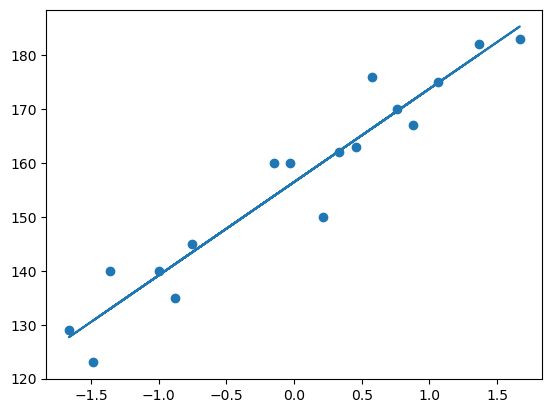

In [99]:
##plot the training data plot best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,reg.predict(X_train))

### prediction of test data
1. prediction hegiht op = intercept_ + coeff_ * (weights)
2. y_pred_test = 156.470 + 17.29(X_test)

In [100]:
#prediction for test data
y_pred = reg.predict(X_test)

In [102]:
##performance matix
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [103]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.665125886795005
10.716374991212605


## R square
formula 
R^2 = 1 - SSR/SSt

In [104]:
from sklearn.metrics import r2_score


In [105]:
score = r2_score(y_test,y_pred)

In [106]:
score

0.7360826717981276

In [107]:
#OLS LInear Rigression
import statsmodels.api as sm

In [108]:
model = sm.OLS(y_train,X_train).fit()

In [110]:
pred = model.predict(X_test)

In [111]:
pred

array([  5.79440897,   5.79440897, -28.78711691,  23.60913442,
        -7.82861638,  34.08838469])

In [114]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Thu, 19 Oct 2023   Prob (F-statistic):                       0.664
Time:                        12:39:19   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\Admin\AppData\Local\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [118]:
#prediction for new data
reg.predict(scaler.transform([[72]]))

C:\Users\Admin\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])

## Multiple Linear Regression

In [123]:
data = pd.read_excel('economic.xlsx')

In [124]:
data.head()

,Unnamed: 0,Year,month,intrest_rate,unemplyment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [126]:
#Drop unnecessary columns
data.drop(labels=['Unnamed: 0','Year','month'],axis=1,inplace=True)

In [127]:
data.head()

,intrest_rate,unemplyment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [130]:
data.isnull().sum()

intrest_rate        0
unemplyment_rate    0
index_price         0
dtype: int64

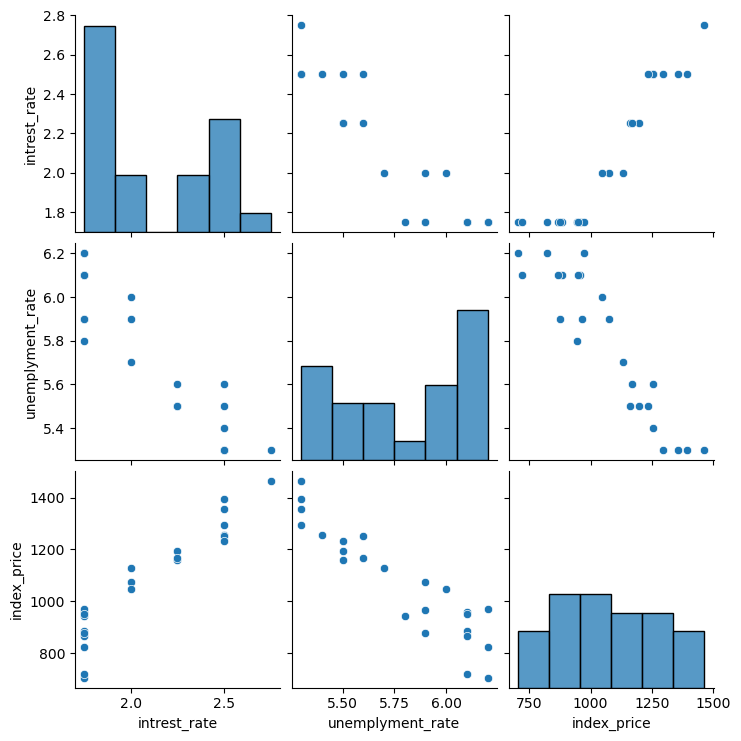

In [131]:
#Lets do visualization

sns.pairplot(data)

In [132]:
data.corr()

,intrest_rate,unemplyment_rate,index_price
intrest_rate,1.000000,-0.925814,0.935793
unemplyment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemplyment rate')

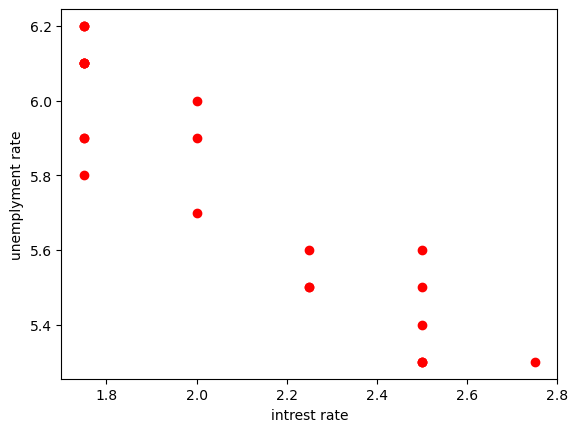

In [135]:
## visualize data points more closy
plt.scatter(data['intrest_rate'],data['unemplyment_rate'],color='r')
plt.xlabel('intrest rate')
plt.ylabel('unemplyment rate')

In [136]:
##independent and depnedent feature

X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [137]:
#Train Test Split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [138]:
#standarization
scaler = StandardScaler()

In [139]:
X_train = scaler.fit_transform(X_train)

In [140]:
X_test = scaler.transform(X_test)

In [141]:
reg.fit(X_train,y_train)

LinearRegression()

In [143]:
#cross validation
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(reg,X_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [144]:
validation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [146]:
np.mean(validation_score)

-5914.828180162388

In [147]:
#prediction
y_pred = reg.predict(X_test)

In [148]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [149]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

5793.762887712579
59.935781523235526
76.11677139574812


In [150]:
#r2 score
score = r2_score(y_test,y_pred)
score

0.8278978091457142

## Assumptions


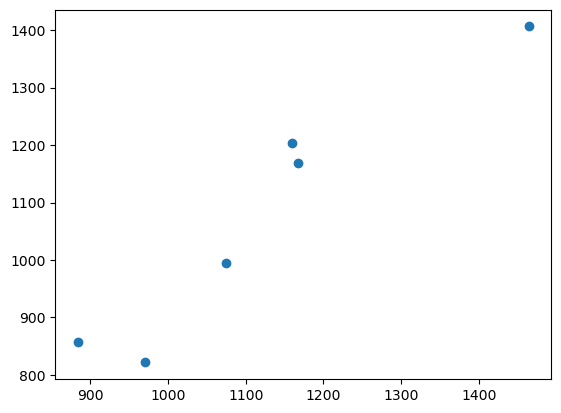

In [151]:
plt.scatter(y_test,y_pred)

In [152]:
residuals = y_test - y_pred
residuals

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64

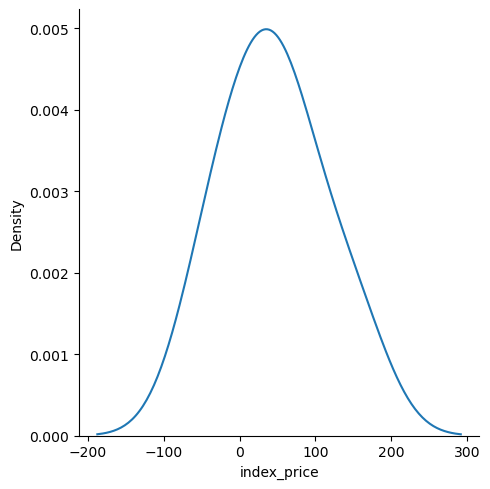

In [154]:
sns.displot(residuals,kind='kde')

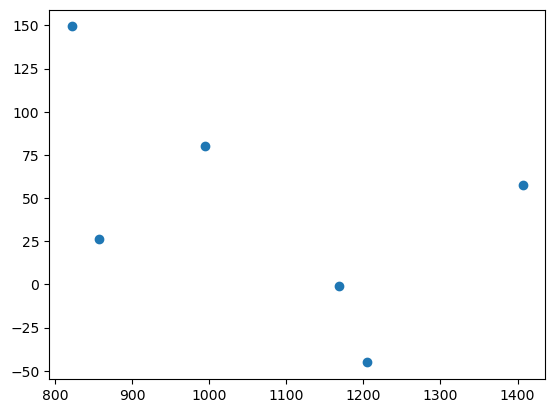

In [155]:
#scatter plot to prediction and residuals
plt.scatter(y_pred,residuals)

In [157]:
model = sm.OLS(y_train,X_train).fit()

In [159]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Thu, 19 Oct 2023   Prob (F-statistic):                       0.754
Time:                        13:27:09   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\Admin\AppData\Local\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [160]:
reg.coef_

array([  88.27275507, -116.25716066])